## Ordinary Least Squares

In [1]:
from sklearn import linear_model

In [2]:
reg=linear_model.LinearRegression()

In [3]:
reg.fit([[0,0],[1,1],[2,2]],[0,1,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
reg.coef_

array([ 0.5,  0.5])

## Ridge regression

In [9]:
reg=linear_model.Ridge(alpha=0.5)
reg.fit([[0,0],[0,0],[1,1]],[0,0.1,1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
reg.coef_

array([ 0.34545455,  0.34545455])

In [11]:
reg.intercept_

0.13636363636363638

In [12]:
reg=linear_model.RidgeCV(alphas=[0.1,1,10])
reg.fit([[0,0],[0,0],[1,1]],[0,0.1,1])

RidgeCV(alphas=[0.1, 1, 10], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [ ]:
reg.alpha_

In [14]:
reg=linear_model.Lasso(alpha=0.1)
reg.fit([[0,0],[1,1]],[0,1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
reg.coef_

array([ 0.6,  0. ])

In [17]:
reg=linear_model.LassoLars(alpha=0.1)
reg.fit([[0,0],[1,1]],[0,1])

LassoLars(alpha=0.1, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [19]:
reg.coef_

array([ 0.71715729,  0.        ])

## Lasso and Elastic Net

In [20]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

/home/aman/ml/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [21]:
from sklearn import datasets
from sklearn.linear_model import lasso_path,enet_path

In [22]:
diabetes=datasets.load_diabetes()

In [23]:
X,y= diabetes.data,diabetes.target


In [24]:
X/=X.std(axis=0)

In [25]:
eps=5e-3 #smaller -> longer path

In [27]:
alphas_lasso, coefs_lasso, _ = lasso_path(X,y,eps,fit_intercept=False)

In [30]:
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(X,y,eps,positive=True,fit_intercept=False)

In [47]:
alphas_enet, coefs_enet, _ = enet_path(X,y,eps=eps,l1_ratio=0.8,fit_intercept=False)

In [50]:
alphas_positive_enet, coefs_positive_enet, _ = enet_path(X,y,eps=eps,l1_ratio=0.8,positive=True,fit_intercept=False)

In [33]:
plt.figure(1)
ax=plt.gca()
colors=cycle(['b','r','g','c','k'])

In [34]:
neg_log_alphas_lasso= -np.log10(alphas_lasso)
neg_log_alphas_enet= -np.log10(alphas_enet)

In [36]:
for coef_l,coef_e,c in zip(coefs_lasso,coefs_enet,colors):
    l1=plt.plot(neg_log_alphas_lasso,coef_l,c=c)
    l2=plt.plot(neg_log_alphas_enet,coef_e,linestyle='--',c=c)

In [37]:
plt.xlabel('-Log(alpha)')

In [38]:
plt.ylabel('coefficients')

In [39]:
plt.title('Lasso and Elastic Net paths')

In [40]:
plt.axis('tight')

(-1.7516642349615168,
 0.6462757737105207,
 -12.912227565579057,
 26.548247699227304)

In [43]:
plt.legend((l1[-1],l2[-1]),('Lasso','Elastic Net'),loc='lower left')

In [44]:
plt.axis('tight')

(-1.7516642349615168,
 0.6462757737105207,
 -12.912227565579057,
 26.548247699227304)

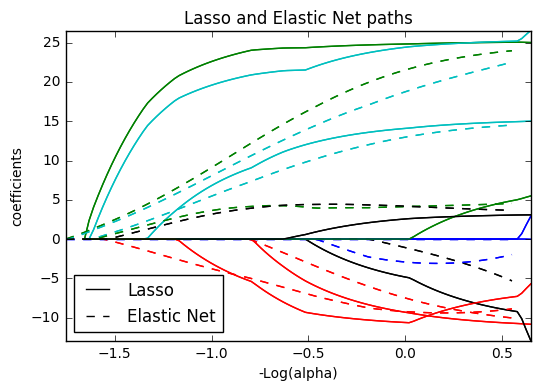

In [45]:
plt.show()

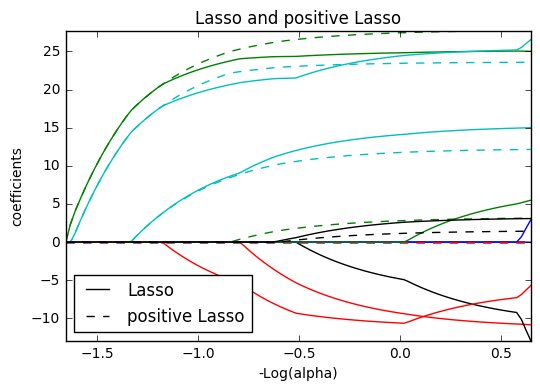

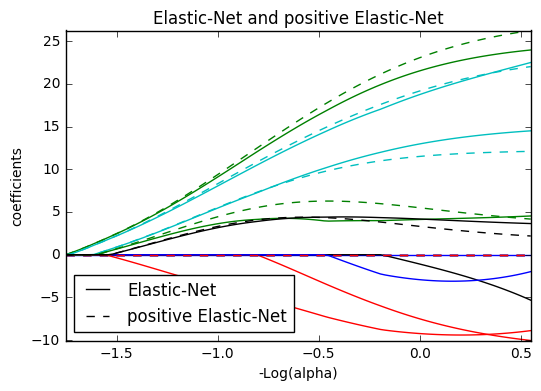

In [52]:
plt.figure(2)
ax = plt.gca()
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
ax = plt.gca()
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

## Lasso path using Lars

In [53]:
alphas,_,coefs=linear_model.lars_path(X,y,method='lasso',verbose=True)

.

In [54]:
xx=np.sum(np.abs(coefs.T),axis=1)
xx/=xx[-1]

In [55]:
plt.plot(xx,coefs.T)
ymin,ymax=plt.ylim()

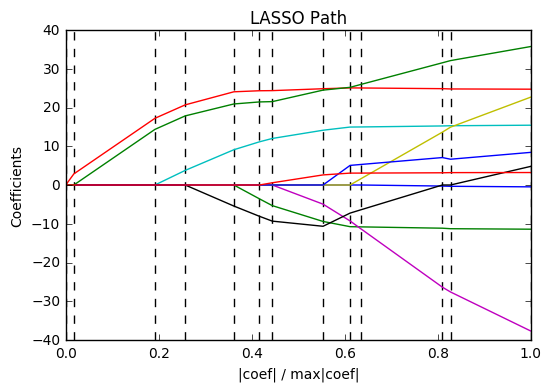

In [56]:
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

## Orthogonal matching pursuit

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal
n_components,n_features=512,100
n_nonzero_coefs=17

y,X,w = make_sparse_coded_signal(n_samples=1,
                                n_components=n_components,
                                n_features=n_features,
                                n_nonzero_coefs=n_nonzero_coefs,
                                random_state=0)
idx, = w.nonzero()

In [61]:
y_noisy=y+0.05*np.random.randn(len(y))

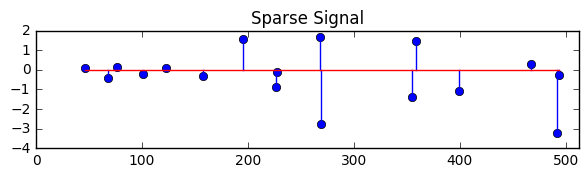

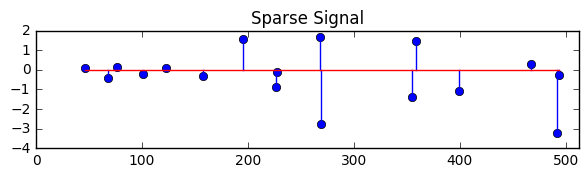

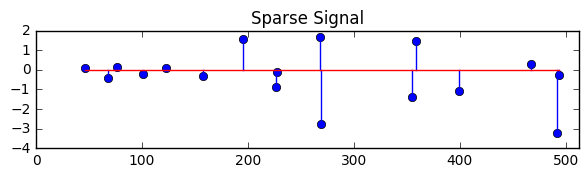

In [64]:
plt.figure(figsize=(7,7))
plt.subplot(4,1,1)
plt.xlim(0,512)
plt.title('Sparse Signal')
plt.stem(idx,w[idx])
plt.show()

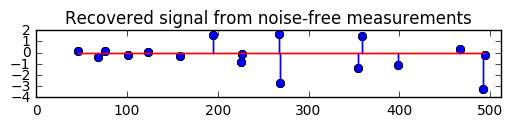

In [66]:
omp=OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X,y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])
plt.show()

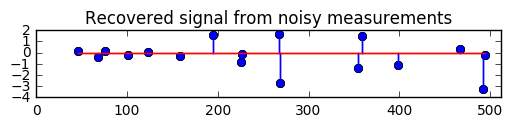

In [68]:

coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])
plt.show()


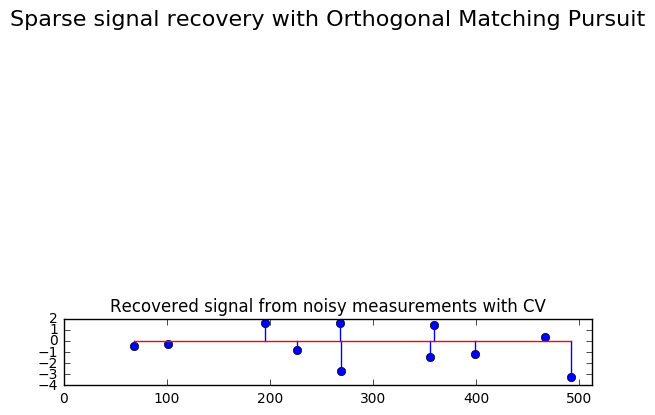

In [69]:
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

## Bayesian Ridge regression

In [79]:
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
print Y

[0.0, 1.0, 2.0, 3.0]


In [72]:
reg=linear_model.BayesianRidge()

In [80]:
reg.fit(X,Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [81]:
reg.coef_

array([ 0.49999993,  0.49999993])

In [83]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
model=Pipeline([('poly',PolynomialFeatures(degree=3)),
               ])